In [1]:
import os
from glob import glob
import numpy as np
import torch
from torchvision import transforms, utils
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# 모델 정의
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler
import time
import copy

In [2]:
os.getcwd()

'C:\\Users\\GaeJu\\pytorch\\학기말과제'

In [3]:
path = '.\\archive'

In [4]:
files = glob(os.path.join(path,'natural_images\\*.jpg'))
print(f'Total images in Train: {len(files)}')
print(f'First five images in Train: \n{files[:5]}')

Total images in Train: 6899
First five images in Train: 
['.\\archive\\natural_images\\airplane_0000.jpg', '.\\archive\\natural_images\\airplane_0001.jpg', '.\\archive\\natural_images\\airplane_0002.jpg', '.\\archive\\natural_images\\airplane_0003.jpg', '.\\archive\\natural_images\\airplane_0004.jpg']


In [5]:
os.mkdir(os.path.join(path,'valid'))

In [6]:
os.listdir("./archive")

['natural_images', 'valid']

In [7]:
for t in ['natural_images','valid']:
    for folder in ['airplane/','car/','cat/','dog/','flower/','fruit/','motorbike/','person/']:
        os.mkdir(os.path.join(path,t,folder)) 

In [8]:
no_of_images=len(files)
print(no_of_images)
shuffle = np.random.permutation(no_of_images)
print(shuffle[1:10])

6899
[1573 1816 2091 1113 1153 5841 2274 4868 4895]


In [9]:
for i in shuffle[:550]:
    folder = files[i].split('\\')[-1].split('_')[0]
    image = files[i].split('\\')[-1] 
    os.rename(files[i],os.path.join(path,'valid',folder,image))   

In [10]:
valid_airplane_files = glob(os.path.join(path,'valid\\airplane\\*.jpg'))
print(f'Valid images in airplane : {len(valid_airplane_files)}')
valid_car_files = glob(os.path.join(path,'valid\\car\\*.jpg'))
print(f'Valid images in car : {len(valid_car_files)}')
valid_cat_files = glob(os.path.join(path,'valid\\cat\\*.jpg'))
print(f'Valid images in cat : {len(valid_cat_files)}')
valid_dog_files = glob(os.path.join(path,'valid\\dog\\*.jpg'))
print(f'Valid images in dog : {len(valid_dog_files)}')
valid_flower_files = glob(os.path.join(path,'valid\\flower\\*.jpg'))
print(f'Valid images in flower : {len(valid_flower_files)}')
valid_fruit_files = glob(os.path.join(path,'valid\\fruit\\*.jpg'))
print(f'Valid images in fruit : {len(valid_fruit_files)}')
valid_motorbike_files = glob(os.path.join(path,'valid\\motorbike\\*.jpg'))
print(f'Valid images in motorbike : {len(valid_motorbike_files)}')
valid_person_files = glob(os.path.join(path,'valid\\person\\*.jpg'))
print(f'Valid images in person : {len(valid_person_files)}')
valid_folder=len(valid_airplane_files)+len(valid_car_files)+\
len(valid_cat_files)+len(valid_dog_files)+len(valid_flower_files)+\
len(valid_fruit_files)+len(valid_motorbike_files)+len(valid_person_files)
print(f'Valid images in ALL : {valid_folder}')

Valid images in airplane : 59
Valid images in car : 71
Valid images in cat : 81
Valid images in dog : 64
Valid images in flower : 61
Valid images in fruit : 84
Valid images in motorbike : 67
Valid images in person : 63
Valid images in ALL : 550


In [11]:
for i in shuffle[550:]:   
    folder = files[i].split('\\')[-1].split('_')[0]
    image = files[i].split('\\')[-1] 
    os.rename(files[i],os.path.join(path,'natural_images',folder,image))

In [12]:
natural_airplane_files = glob(os.path.join(path,'natural_images\\airplane\\*.jpg'))
print(f'natural_images in airplane : {len(natural_airplane_files)}')
natural_car_files = glob(os.path.join(path,'natural_images\\car\\*.jpg'))
print(f'natural_images in car : {len(natural_car_files)}')
natural_cat_files = glob(os.path.join(path,'natural_images\\cat\\*.jpg'))
print(f'natural_images in cat : {len(natural_cat_files)}')
natural_dog_files = glob(os.path.join(path,'natural_images\\dog\\*.jpg'))
print(f'natural_images in dog : {len(natural_dog_files)}')
natural_flower_files = glob(os.path.join(path,'natural_images\\flower\\*.jpg'))
print(f'natural_images in flower : {len(natural_flower_files)}')
natural_fruit_files = glob(os.path.join(path,'natural_images\\fruit\\*.jpg'))
print(f'natural_images in fruit : {len(natural_fruit_files)}')
natural_motorbike_files = glob(os.path.join(path,'natural_images\\motorbike\\*.jpg'))
print(f'natural_images in motorbike : {len(natural_motorbike_files)}')
natural_person_files = glob(os.path.join(path,'natural_images\\person\\*.jpg'))
print(f'natural_images in person : {len(natural_person_files)}')
natural_folder=len(natural_airplane_files)+len(natural_car_files)+\
len(natural_cat_files)+len(natural_dog_files)+len(natural_flower_files)+\
len(natural_fruit_files)+len(natural_motorbike_files)+len(natural_person_files)
print(f'natural images in ALL : {natural_folder}')

natural_images in airplane : 668
natural_images in car : 897
natural_images in cat : 804
natural_images in dog : 638
natural_images in flower : 782
natural_images in fruit : 916
natural_images in motorbike : 721
natural_images in person : 923
natural images in ALL : 6349


In [13]:
data_transform = transforms.Compose([transforms.Resize((224,224))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
natural = ImageFolder('./archive/natural_images/',transform =data_transform)
valid = ImageFolder('./archive/valid/',transform =data_transform)

train_indices = list(range(len(natural)))
valid_indices = list(range(len(valid)))

In [14]:
print(len(natural))
print(len(valid))
print(natural[0][0].size())
print(valid[0][0].size())

6349
550
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


C:\Users\GaeJu\anaconda3\lib\site-packages\torchvision\transforms\functional.py:136: UserWarning: Legacy tensor constructor is deprecated. Use: torch.tensor(...) for creating tensors from tensor-like objects; or torch.empty(...) for creating an uninitialized tensor with specific sizes. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:476.)
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


In [15]:
print(natural.__getitem__(0))

(tensor([[[ 1.7009,  1.7180,  1.7180,  ...,  1.3927,  1.3927,  1.3755],
         [ 1.7009,  1.7180,  1.7180,  ...,  1.3927,  1.3927,  1.3755],
         [ 1.6838,  1.7009,  1.7009,  ...,  1.3927,  1.3927,  1.3584],
         ...,
         [ 0.1426, -0.0801, -0.4054,  ...,  0.1939,  0.2453,  0.2453],
         [ 0.1768, -0.0629, -0.5082,  ...,  0.2282,  0.2796,  0.2796],
         [ 0.1939, -0.0629, -0.5596,  ...,  0.2453,  0.2967,  0.2967]],

        [[ 2.1660,  2.1835,  2.1835,  ...,  1.7458,  1.7633,  1.7458],
         [ 2.1660,  2.1835,  2.1835,  ...,  1.7458,  1.7633,  1.7458],
         [ 2.1485,  2.1660,  2.1660,  ...,  1.7633,  1.7808,  1.7458],
         ...,
         [-0.0924, -0.3200, -0.6527,  ..., -0.1450, -0.0924, -0.0924],
         [-0.0574, -0.3025, -0.7402,  ..., -0.1099, -0.0574, -0.0574],
         [-0.0399, -0.3025, -0.7752,  ..., -0.0924, -0.0399, -0.0399]],

        [[ 2.2391,  2.2566,  2.2566,  ...,  1.8731,  1.8557,  1.8731],
         [ 2.2391,  2.2566,  2.2566,  ...,  

In [16]:
print(natural.__getitem__(6300))

(tensor([[[-1.3644, -1.3815, -1.3644,  ..., -1.3815, -1.6042, -1.7583],
         [-1.2274, -1.2274, -1.2274,  ..., -1.3130, -1.5699, -1.7412],
         [-1.1247, -1.1075, -1.0904,  ..., -1.2103, -1.4843, -1.6727],
         ...,
         [ 1.3584,  1.2557,  1.2214,  ...,  1.5468,  1.5639,  1.5982],
         [ 1.4098,  1.2728,  1.2385,  ...,  1.5639,  1.5810,  1.6324],
         [ 1.4612,  1.3242,  1.2214,  ...,  1.5982,  1.6324,  1.6838]],

        [[-1.5455, -1.5630, -1.5630,  ..., -1.3529, -1.6155, -1.7906],
         [-1.4405, -1.4405, -1.4230,  ..., -1.2654, -1.5805, -1.7906],
         [-1.3529, -1.3529, -1.3179,  ..., -1.1954, -1.5105, -1.7206],
         ...,
         [ 1.1856,  1.0805,  1.0455,  ...,  1.5007,  1.4832,  1.5182],
         [ 1.2031,  1.0980,  1.0630,  ...,  1.5182,  1.5007,  1.5357],
         [ 1.2381,  1.1155,  1.0455,  ...,  1.5532,  1.5532,  1.5707]],

        [[-1.5779, -1.6127, -1.6127,  ..., -1.3339, -1.6127, -1.7870],
         [-1.4907, -1.4907, -1.4907,  ..., -

In [17]:
print(natural.classes) 
print(natural.class_to_idx)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
{'airplane': 0, 'car': 1, 'cat': 2, 'dog': 3, 'flower': 4, 'fruit': 5, 'motorbike': 6, 'person': 7}


torch.Size([3, 224, 224])
max: 0.9921568689346314, min: 2.7418136649970393e-09
(224, 224, 3)


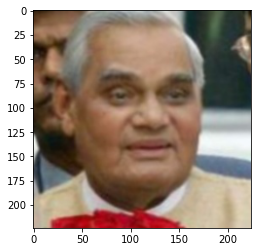

In [18]:
def imshow(img):
    """Imshow for Tensor."""
    print(img.shape)
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    print("max: {}, min: {}".format(np.max(img), np.min(img)))
    plt.imshow(img)
    print(img.shape)
    
imshow(natural[6300][0])

In [19]:
natural_data_loader = torch.utils.data.DataLoader(natural,shuffle=True,batch_size=64,num_workers=4)
valid_data_loader = torch.utils.data.DataLoader(valid,batch_size=64,num_workers=0)
print("Length of the natural_loader:", len(natural_data_loader))
print("Length of the val_loader:", len(valid_data_loader))

Length of the natural_loader: 100
Length of the val_loader: 9


In [20]:
dataset_sizes = {'natural_images':len(natural_data_loader.dataset),'valid':len(valid_data_loader.dataset)}
print(dataset_sizes)
print(dataset_sizes['natural_images'])
print(dataset_sizes['valid'])

{'natural_images': 6349, 'valid': 550}
6349
550


In [21]:
dataloaders = {'natural_images':natural_data_loader,'valid':valid_data_loader}
print("Length of the train_loader:", len(dataloaders['natural_images']))
print("Length of the val_loader:", len(dataloaders['valid']))

Length of the train_loader: 100
Length of the val_loader: 9


torch.Size([64, 3, 224, 224])
torch.Size([64])
tensor([7, 2, 0, 4, 0, 7, 7, 7, 3, 2, 0, 5, 7, 2, 1, 6, 5, 7, 4, 7, 7, 4, 7, 7,
        1, 3, 1, 4, 2, 5, 3, 1, 5, 2, 5, 4, 2, 4, 5, 6, 5, 7, 6, 7, 6, 2, 2, 6,
        4, 2, 6, 5, 5, 0, 2, 7, 4, 6, 1, 4, 6, 5, 6, 4])
torch.Size([3, 1810, 1810])
torch.Size([3, 1810, 1810])
max: 1.0, min: 0.0
(1810, 1810, 3)


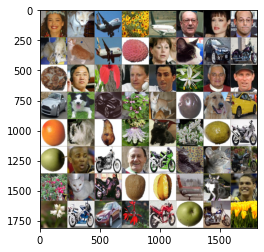

In [22]:
# Get a batch of training data
images, labels = next(iter(dataloaders['natural_images']))
print(images.shape)
print(labels.shape)
print(labels)
# Make a grid from batch
img_grid = utils.make_grid(images)
print(img_grid.shape)
imshow(img_grid)

## 모델 정의

In [27]:
model = models.resnet18(pretrained=True)
#print(model)
FC_in_features = model.fc.in_features
print("number of Fully connected layer input feature:", FC_in_features)
# 여기서 각 출력 샘플의 크기는 2로 설정합니다.
model.fc = nn.Linear(in_features=FC_in_features, out_features=8)
print(model.fc)

number of Fully connected layer input feature: 512
Linear(in_features=512, out_features=8, bias=True)


In [28]:
criterion = nn.CrossEntropyLoss()
# 모든 매개변수들이 최적화되었는지 관찰
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# 7 에폭마다 0.1씩 학습률 감소
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

## 모델 학습

In [29]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
   
    best_model_wts = model.state_dict()
#    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # 각 Epoch은 학습 단계와 검증 단계를 거침
        for phase in ['natural_images', 'valid']:
            if phase == 'natural_images':
                scheduler.step()
                model.train(True)  # 학습 모드 설정
            else:
 #               model.train(False)  # 검증 모드 설정
                model.eval()  # 검

            running_loss = 0.0
            running_corrects = 0

            # 데이터 반
            for data in dataloaders[phase]:
                # 입력 데이터 가져오기
                inputs, labels = data
                
                # 파라미터 기울기 초기화
                optimizer.zero_grad()
                
                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # 학습 단계에서만 수행, 역전파 + 옵티마이즈(최적화)
                if phase == 'natural_images':
                    loss.backward()
                    optimizer.step()

                # 통계
                running_loss += loss.data
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss.item() / dataset_sizes[phase]
            epoch_acc = running_corrects.item() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # 모델 복사(Deep Copy)
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
#                best_model_wts = copy.deepcopy(model.state_dict())
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # 최적의 모델 가중치 로딩
    model.load_state_dict(best_model_wts)
    return model

In [33]:
model_ft = train_model(model, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=4)

Epoch 0/3
----------
natural_images Loss: 0.0006 Acc: 0.9964
valid Loss: 0.0004 Acc: 0.9964

Epoch 1/3
----------
natural_images Loss: 0.0004 Acc: 0.9972
valid Loss: 0.0002 Acc: 0.9982

Epoch 2/3
----------
natural_images Loss: 0.0003 Acc: 0.9987
valid Loss: 0.0002 Acc: 1.0000

Epoch 3/3
----------
natural_images Loss: 0.0002 Acc: 0.9989
valid Loss: 0.0002 Acc: 0.9982

Training complete in 37m 56s
Best val Acc: 1.000000
